In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
data = load_breast_cancer()
X = data.data
y = data.target

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [4]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [5]:
svm_linear = SVC(kernel='linear', C=1.0)
svm_linear.fit(X_pca, y)


SVC(kernel='linear')

In [6]:
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_rbf.fit(X_pca, y)


SVC()

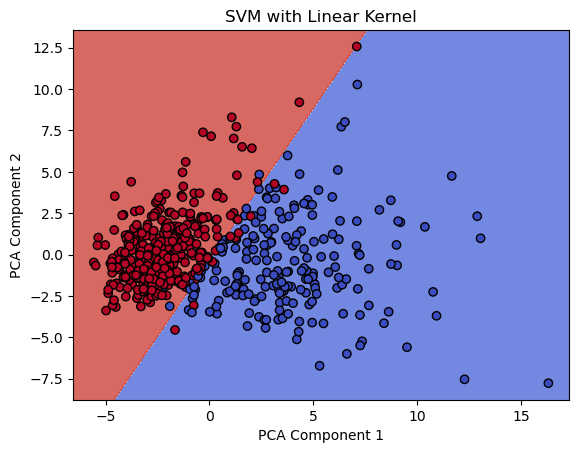

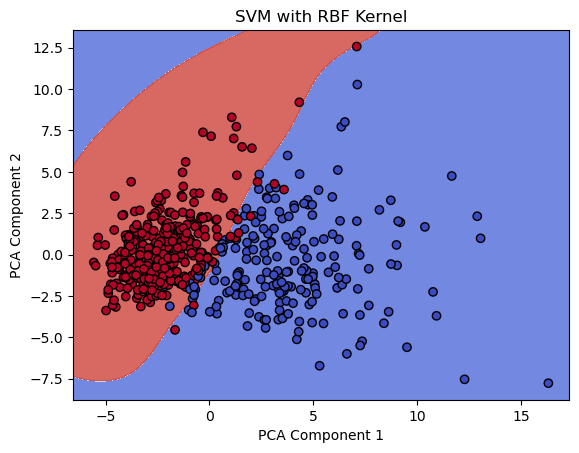

In [7]:
def plot_decision_boundary(model, X, y, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(title)
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.show()

plot_decision_boundary(svm_linear, X_pca, y, "SVM with Linear Kernel")
plot_decision_boundary(svm_rbf, X_pca, y, "SVM with RBF Kernel")

In [8]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.001],
    'kernel': ['rbf']
}
grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5)
grid.fit(X_scaled, y)

print("Best parameters found:", grid.best_params_)


Best parameters found: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


In [9]:
best_model = grid.best_estimator_
scores = cross_val_score(best_model, X_scaled, y, cv=5)
print("Cross-validated accuracy: {:.2f}%".format(scores.mean() * 100))


Cross-validated accuracy: 97.89%


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[41  2]
 [ 0 71]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

